In [45]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#import csv
internet_data = pd.read_csv('../Resources/internet-data.csv')

# Function to clean header names
def clean_header_name(header_name):
    # Split the header name by ')'
    parts = header_name.split(')')
    # Check if there are at least 2 parts and return the part after ')' if true
    if len(parts) >= 2:
        return parts[1].strip()
    else:
        return header_name

# Apply the cleaning function to each column header
internet_data.columns = [clean_header_name(col) for col in internet_data.columns]

# display first few rows
internet_data.head()

,Country,Edition,Internet users,Fixed-line broadband subscribers,Mobile subscribers,Gender gap in internet access,Gender gap in mobile phone access,Average fixed broadband upload speed,Average fixed broadband download speed,Average fixed broadband latency,...,Internet users (population,Offline population,Internet access gender gap,Mobile phone access gender gap,Internet users (percent of population,Male internet users,Female internet users,Male mobile phone subscribers,Female mobile phone subscribers,Total fixed line broadband subscribers
0,United States,E1,81.5,31.85,119.1,NaN,NaN,25.30,51.74,45.00,...,239.23,81.65,NaN,NaN,74.6,NaN,NaN,95.0,91.0,102212000
1,United States,E2,81.9,32.73,122.6,1.1,2.1,23.40,63.31,34.77,...,276.32,46.69,1.0,2.0,85.5,87.0,86.0,95.0,93.0,105714000
2,United States,E3,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,E4,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,E5,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000


In [46]:
# printing column names just to see what we're dealing with
print(internet_data.columns)

Index(['Country', 'Edition', 'Internet users',
       'Fixed-line broadband subscribers', 'Mobile subscribers',
       'Gender gap in internet access', 'Gender gap in mobile phone access',
       'Average fixed broadband upload speed',
       'Average fixed broadband download speed',
       'Average fixed broadband latency', 'Average mobile upload speed',
       'Average mobile download speed', 'Average mobile latency',
       'Bandwidth capacity', 'Network coverage (min. 2G',
       'Network coverage (min. 3G', 'Network coverage (min. 4G',
       '5G deployment', 'Government initiatives to make Wi-Fi available',
       'Private sector initiatives to make Wi-Fi available',
       'Unlicensed spectrum policy', 'Internet exchange points',
       'Urban electricity access', 'Rural electricity access',
       'Smartphone cost (handset', 'Mobile phone cost (prepaid tariff',
       'Mobile phone cost (postpaid tariff',
       'Fixed-line monthly broadband cost',
       'Average revenue per u

## The next block of code is where we replace the NaNs with 0s. This is where we can try any number of other things to see how it affects the outputs and charts later.

In [47]:
edition_mapping = {'E1': 2017, 'E2': 2018, 'E3': 2019, 'E4': 2020, 'E5': 2021}

internet_data['Edition'] = internet_data['Edition'].map(edition_mapping)

#fill NaN values with 0
internet_data.fillna(0, inplace=True)

internet_data

,Country,Edition,Internet users,Fixed-line broadband subscribers,Mobile subscribers,Gender gap in internet access,Gender gap in mobile phone access,Average fixed broadband upload speed,Average fixed broadband download speed,Average fixed broadband latency,...,Internet users (population,Offline population,Internet access gender gap,Mobile phone access gender gap,Internet users (percent of population,Male internet users,Female internet users,Male mobile phone subscribers,Female mobile phone subscribers,Total fixed line broadband subscribers
0,United States,2017,81.5,31.85,119.1,0.0,0.0,25.30,51.74,45.00,...,239.23,81.65,0.0,0.0,74.6,0.0,0.0,95.0,91.0,102212000
1,United States,2018,81.9,32.73,122.6,1.1,2.1,23.40,63.31,34.77,...,276.32,46.69,1.0,2.0,85.5,87.0,86.0,95.0,93.0,105714000
2,United States,2019,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,2020,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,2021,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Zimbabwe,2017,21.6,1.19,92.3,0.0,0.0,7.60,8.41,73.00,...,3.14,10.67,0.0,0.0,22.7,0.0,0.0,75.0,68.0,163987
596,Zimbabwe,2018,22.1,1.22,91.8,32.4,1.2,9.12,9.52,41.92,...,3.24,10.79,12.0,1.0,23.1,37.0,25.0,81.0,80.0,170838
597,Zimbabwe,2019,24.0,1.32,99.0,45.2,2.5,9.74,9.79,45.13,...,3.85,10.39,19.0,2.0,27.1,42.0,23.0,80.0,78.0,187310
598,Zimbabwe,2020,30.3,1.41,89.4,26.3,-2.7,11.46,12.16,55.46,...,3.85,10.39,10.0,-2.0,27.1,38.0,28.0,75.0,77.0,203056


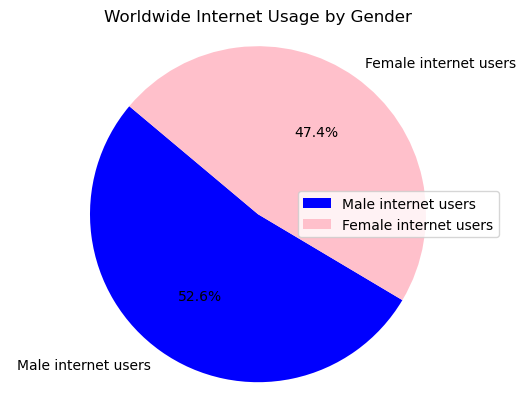

In [48]:
# Assuming internet_data contains the correct proportions for each category
categories = ['Male internet users', 'Female internet users']
sizes = [internet_data["Male internet users"].sum(), internet_data["Female internet users"].sum()]

plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Worldwide Internet Usage by Gender')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [51]:
#drop 2017 and 2018
years_to_drop = [2017, 2018]

internet_data_recent = internet_data[~internet_data['Edition'].isin(years_to_drop)]

internet_data_recent


,Country,Edition,Internet users,Fixed-line broadband subscribers,Mobile subscribers,Gender gap in internet access,Gender gap in mobile phone access,Average fixed broadband upload speed,Average fixed broadband download speed,Average fixed broadband latency,...,Internet users (population,Offline population,Internet access gender gap,Mobile phone access gender gap,Internet users (percent of population,Male internet users,Female internet users,Male mobile phone subscribers,Female mobile phone subscribers,Total fixed line broadband subscribers
2,United States,2019,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,2020,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,2021,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000
7,Algeria,2019,54.2,7.76,110.8,11.7,8.9,2.59,3.77,64.71,...,19.71,21.62,7.0,8.0,47.7,60.0,53.0,90.0,82.0,3210267
8,Algeria,2020,74.4,7.26,111.7,21.7,7.3,1.97,3.87,64.99,...,20.64,21.45,13.0,6.0,49.0,60.0,47.0,82.0,76.0,3067022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Zambia,2020,17.7,0.42,89.2,24.3,4.7,8.21,10.81,57.09,...,2.48,14.87,9.0,3.0,14.3,37.0,28.0,64.0,61.0,72228
594,Zambia,2021,17.7,0.50,96.4,27.8,13.9,12.25,12.35,49.89,...,2.48,14.87,10.0,10.0,14.3,36.0,26.0,72.0,62.0,88891
597,Zimbabwe,2019,24.0,1.32,99.0,45.2,2.5,9.74,9.79,45.13,...,3.85,10.39,19.0,2.0,27.1,42.0,23.0,80.0,78.0,187310
598,Zimbabwe,2020,30.3,1.41,89.4,26.3,-2.7,11.46,12.16,55.46,...,3.85,10.39,10.0,-2.0,27.1,38.0,28.0,75.0,77.0,203056


In [52]:
# # Find countries with any missing values
countries_with_missing = internet_data_recent[internet_data_recent.isnull().any(axis=1)]['Country'].unique()

# # Drop all rows for those countries
df_no_missing_countries = internet_data_recent[~internet_data_recent['Country'].isin(countries_with_missing)]

# # Check the result
df_no_missing_countries


,Country,Edition,Internet users,Fixed-line broadband subscribers,Mobile subscribers,Gender gap in internet access,Gender gap in mobile phone access,Average fixed broadband upload speed,Average fixed broadband download speed,Average fixed broadband latency,...,Internet users (population,Offline population,Internet access gender gap,Mobile phone access gender gap,Internet users (percent of population,Male internet users,Female internet users,Male mobile phone subscribers,Female mobile phone subscribers,Total fixed line broadband subscribers
2,United States,2019,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,2020,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,2021,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000
7,Algeria,2019,54.2,7.76,110.8,11.7,8.9,2.59,3.77,64.71,...,19.71,21.62,7.0,8.0,47.7,60.0,53.0,90.0,82.0,3210267
8,Algeria,2020,74.4,7.26,111.7,21.7,7.3,1.97,3.87,64.99,...,20.64,21.45,13.0,6.0,49.0,60.0,47.0,82.0,76.0,3067022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Zambia,2020,17.7,0.42,89.2,24.3,4.7,8.21,10.81,57.09,...,2.48,14.87,9.0,3.0,14.3,37.0,28.0,64.0,61.0,72228
594,Zambia,2021,17.7,0.50,96.4,27.8,13.9,12.25,12.35,49.89,...,2.48,14.87,10.0,10.0,14.3,36.0,26.0,72.0,62.0,88891
597,Zimbabwe,2019,24.0,1.32,99.0,45.2,2.5,9.74,9.79,45.13,...,3.85,10.39,19.0,2.0,27.1,42.0,23.0,80.0,78.0,187310
598,Zimbabwe,2020,30.3,1.41,89.4,26.3,-2.7,11.46,12.16,55.46,...,3.85,10.39,10.0,-2.0,27.1,38.0,28.0,75.0,77.0,203056


In [53]:
internet_data_recent = internet_data_recent.dropna(how='any')

internet_data_recent

,Country,Edition,Internet users,Fixed-line broadband subscribers,Mobile subscribers,Gender gap in internet access,Gender gap in mobile phone access,Average fixed broadband upload speed,Average fixed broadband download speed,Average fixed broadband latency,...,Internet users (population,Offline population,Internet access gender gap,Mobile phone access gender gap,Internet users (percent of population,Male internet users,Female internet users,Male mobile phone subscribers,Female mobile phone subscribers,Total fixed line broadband subscribers
2,United States,2019,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,2020,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,2021,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000
7,Algeria,2019,54.2,7.76,110.8,11.7,8.9,2.59,3.77,64.71,...,19.71,21.62,7.0,8.0,47.7,60.0,53.0,90.0,82.0,3210267
8,Algeria,2020,74.4,7.26,111.7,21.7,7.3,1.97,3.87,64.99,...,20.64,21.45,13.0,6.0,49.0,60.0,47.0,82.0,76.0,3067022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Zambia,2020,17.7,0.42,89.2,24.3,4.7,8.21,10.81,57.09,...,2.48,14.87,9.0,3.0,14.3,37.0,28.0,64.0,61.0,72228
594,Zambia,2021,17.7,0.50,96.4,27.8,13.9,12.25,12.35,49.89,...,2.48,14.87,10.0,10.0,14.3,36.0,26.0,72.0,62.0,88891
597,Zimbabwe,2019,24.0,1.32,99.0,45.2,2.5,9.74,9.79,45.13,...,3.85,10.39,19.0,2.0,27.1,42.0,23.0,80.0,78.0,187310
598,Zimbabwe,2020,30.3,1.41,89.4,26.3,-2.7,11.46,12.16,55.46,...,3.85,10.39,10.0,-2.0,27.1,38.0,28.0,75.0,77.0,203056


In [54]:
internet_data_recent.dtypes

Country                                    object
Edition                                     int64
Internet users                            float64
Fixed-line broadband subscribers          float64
Mobile subscribers                        float64
                                           ...   
Male internet users                       float64
Female internet users                     float64
Male mobile phone subscribers             float64
Female mobile phone subscribers           float64
Total fixed line broadband subscribers      int64
Length: 86, dtype: object

In [55]:
#get rid of irrelevant columns

relevant_columns = ['Country', 'Edition', 
                'Internet users',
                'Gender gap in internet access', 
                'Gender gap in mobile phone access',
                'Level of literacy', 
                'Educational attainment',
                'Support for digital literacy', 
                'Population',
                'Urban population',
                'GNI per capita',
                'Population under the poverty line',
                'Internet access gender gap',
                'Mobile phone access gender gap', 
                'Internet users (percent of population',
                'Male internet users', 
                'Female internet users',
                'Male mobile phone subscribers', 
                'Female mobile phone subscribers']

demographic_df = internet_data_recent[relevant_columns]
demographic_df

,Country,Edition,Internet users,Gender gap in internet access,Gender gap in mobile phone access,Level of literacy,Educational attainment,Support for digital literacy,Population,Urban population,GNI per capita,Population under the poverty line,Internet access gender gap,Mobile phone access gender gap,Internet users (percent of population,Male internet users,Female internet users,Male mobile phone subscribers,Female mobile phone subscribers
2,United States,2019,83.8,-3.4,0.0,100.0,13.4,3.0,327.1,82.1,59060,1.0,-3.0,0.0,87.3,87.0,90.0,95.0,95.0
3,United States,2020,85.3,1.1,1.1,100.0,13.4,3.0,329.1,82.3,63200,1.0,1.0,1.0,88.5,91.0,90.0,95.0,94.0
4,United States,2021,85.3,0.0,3.1,100.0,13.4,3.0,331.0,82.5,65760,1.0,0.0,3.0,88.5,94.0,94.0,97.0,94.0
7,Algeria,2019,54.2,11.7,8.9,80.2,8.0,1.0,42.1,72.0,3920,0.2,7.0,8.0,47.7,60.0,53.0,90.0,82.0
8,Algeria,2020,74.4,21.7,7.3,81.4,8.0,1.0,42.9,72.6,3960,0.2,13.0,6.0,49.0,60.0,47.0,82.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Zambia,2020,17.7,24.3,4.7,86.7,7.1,3.0,17.9,43.5,1460,29.5,9.0,3.0,14.3,37.0,28.0,64.0,61.0
594,Zambia,2021,17.7,27.8,13.9,86.7,7.1,3.0,18.4,44.1,1450,29.5,10.0,10.0,14.3,36.0,26.0,72.0,62.0
597,Zimbabwe,2019,24.0,45.2,2.5,86.9,8.3,0.0,14.4,32.2,1360,5.2,19.0,2.0,27.1,42.0,23.0,80.0,78.0
598,Zimbabwe,2020,30.3,26.3,-2.7,86.9,8.3,1.0,14.6,32.2,1530,9.3,10.0,-2.0,27.1,38.0,28.0,75.0,77.0


In [56]:
##Data Cleaning and Organizaion

#rename columns
newcolname_dict = {
    'Country': 'Country',
    'Edition': 'Edition',
    'Population': 'Population (Millions)',
    'Internet users (percent of population)': 'Internet Users (% of Population)',
    'Level of literacy': 'Literacy (% of Population)',
    'Educational attainment': 'Education Level (Years of Schooling)',
    'Support for digital literacy': 'Support for Digital Literacy (Qualitative Rating 1-3)',
    'Urban population': 'Urban Population (% of Total Population)',
    'GNI per capita': 'GNI Per Capita (USD per Person)',
    'Population under the poverty line': 'Population Under the Poverty Line (% of Population)',
    'Internet access gender gap': 'Internet Access Gender Gap (Difference in Percentage Points)',
    'Mobile phone access gender gap': 'Mobile Phone Access Gender Gap (Difference in Percengage Points)',
    'Male internet users': 'Male Internet Users (% of Male Population)',
    'Female internet users': 'Female Internet Users (% of Female Population)',
    'Male mobile phone subscribers': 'Male Mobile Phone Subscribers (% of Male Population)',
    'emale mobile phone subscribers': 'Female Mobile Phone Subscribers (% of Female Population)'
}

demographic_df_renamed = demographic_df.rename(columns=newcolname_dict)

demographic_df_renamed.head()

,Country,Edition,Internet users,Gender gap in internet access,Gender gap in mobile phone access,Literacy (% of Population),Education Level (Years of Schooling),Support for Digital Literacy (Qualitative Rating 1-3),Population (Millions),Urban Population (% of Total Population),GNI Per Capita (USD per Person),Population Under the Poverty Line (% of Population),Internet Access Gender Gap (Difference in Percentage Points),Mobile Phone Access Gender Gap (Difference in Percengage Points),Internet users (percent of population,Male Internet Users (% of Male Population),Female Internet Users (% of Female Population),Male Mobile Phone Subscribers (% of Male Population),Female mobile phone subscribers
2,United States,2019,83.8,-3.4,0.0,100.0,13.4,3.0,327.1,82.1,59060,1.0,-3.0,0.0,87.3,87.0,90.0,95.0,95.0
3,United States,2020,85.3,1.1,1.1,100.0,13.4,3.0,329.1,82.3,63200,1.0,1.0,1.0,88.5,91.0,90.0,95.0,94.0
4,United States,2021,85.3,0.0,3.1,100.0,13.4,3.0,331.0,82.5,65760,1.0,0.0,3.0,88.5,94.0,94.0,97.0,94.0
7,Algeria,2019,54.2,11.7,8.9,80.2,8.0,1.0,42.1,72.0,3920,0.2,7.0,8.0,47.7,60.0,53.0,90.0,82.0
8,Algeria,2020,74.4,21.7,7.3,81.4,8.0,1.0,42.9,72.6,3960,0.2,13.0,6.0,49.0,60.0,47.0,82.0,76.0


In [57]:
#reorder columns
new_column_order = [
    'Country',
    'Edition',
    'Population (Millions)',
    'Internet Users (% of Population',
    'Urban Population (% of Total Population)',
    'Population Under the Poverty Line (% of Population)',
    'GNI Per Capita (USD per Person)',
    'Literacy (% of Population)',
    'Education Level (Years of Schooling)',
    'Support for Digital Literacy (Qualitative Rating 1-3)',
    'Internet Access Gender Gap (Difference in Percentage Points)',
    'Male Internet Users (% of Male Population)',
    'Female Internet Users (% of Female Population)',
    'Mobile Phone Access Gender Gap (Difference in Percengage Points)',
    'Male Mobile Phone Subscribers (% of Male Population)',
    'Female Mobile Phone Subscribers (% of Female Population)'
]

demographic_df_reordered = demographic_df_renamed[new_column_order]

demographic_df_reordered


KeyError: "['Internet Users (% of Population', 'Female Mobile Phone Subscribers (% of Female Population)'] not in index"